# Explore the generated data
Here we explore the data that is generated with the [generate-data.ipynb](generate-data.ipynb) notebook.
You can either run the simulations or download the data set. See [README.md](README.md) for the download link and instructions.

### Joining the seperate data files of one simulation together, example:
```python
# for example if the generated files have the following names:
# 'tmp/1d_alpha_vs_B_x_000.hdf',
# 'tmp/1d_alpha_vs_B_x_001.hdf', 
# 'tmp/1d_alpha_vs_B_x_002.hdf', ...
# The following line with join the files and save it as 'data/new_name.hdf'.
df = common.combine_dfs('tmp/1d_alpha_vs_B_x_*.hdf', 'data/new_name.hdf')
```

In [1]:
import holoviews as hv
import numpy as np
import pandas as pd
import common
hv.notebook_extension()

def add_energy_gs(df):
    hbar = df.hbar.unique()[0]
    eV = df.eV.unique()[0]
    flux_quantum_over_2pi =  hbar / (2 * eV) / (eV * 1e6)
    df['E'] = df['currents'].apply(np.cumsum)
    df['E'] *= flux_quantum_over_2pi
    df['phase_gs_arg'] = df['E'].apply(np.argmin)
    df['phase_gs'] = [row['phases'][row['phase_gs_arg']] for i, row in df.iterrows()]

    # Move the phase_gs from -π to +π if they are within the tolerance
    tol = np.diff(df['phases'].iloc[0]).max()
    df['phase_gs'] = [-row['phase_gs'] if row['phase_gs'] < -(np.pi - tol) else row['phase_gs'] 
                      for i, row in df.iterrows()]
    return df

In [2]:
import matplotlib 

In [3]:
matplotlib.__version__

'2.0.0'

# Data like Figure 4 but with all combinations

In [4]:
%%opts Curve (color='k') Scatter (s=200)

def plot(orbital, g, alpha, mu, disorder, salt, B_y):
    gr = gb.get_group((orbital, g, alpha, mu, disorder, salt))
    gr = gr.set_index('B_y', drop=False)
    y = gr.loc[B_y]
    current = hv.Curve((gr.B_y, gr.current_c), kdims=['B_y'], vdims=['I_c'])[0:, 0:]
    phase_gs = hv.Curve((gr.B_y, gr.phase_gs), kdims=['B_y'], vdims=['theta_gs'])[:, -3.2:3.2]
    cpr = hv.Curve((y.phases, y.currents), kdims=['phi'], vdims=['I'])
    energy = hv.Curve((y.phases, y.E), kdims=['phi'], vdims=['I'])
    E_min = hv.Scatter((y.phase_gs, y.E[y.phase_gs_arg]), kdims=['phi'], vdims=['E'])
    VLine = hv.VLine(B_y)
    return (current * VLine + phase_gs * VLine + cpr + energy * E_min).cols(2)

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_y]
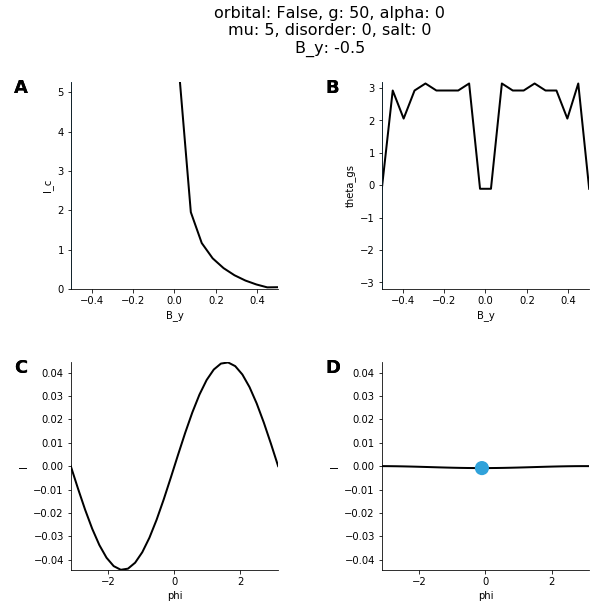

In [5]:
df = pd.read_hdf('tmp/I_c(B_y)_mu_5meV_disorder0meV_T0.05K_orbital_SOI_Zeeman.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_y', values=df.B_y.unique())]
hv.DynamicMap(plot, kdims=kdims)

:Curve   [x]   (y)
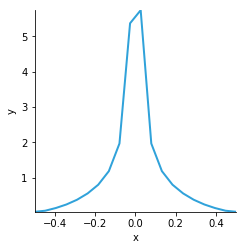

In [13]:
df.current_c[60:80],df.B_y[60:80]
hv.Curve((df.B_y[20:40],df.current_c[20:40]))

:Curve   [x]   (y)
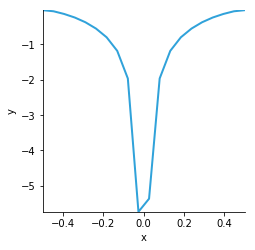

In [14]:
hv.Curve((df.B_y[20:40]*-1,df.current_c[20:40]*-1))

In [62]:
By = np.linspace(-0.5,0.5,20)

In [84]:
df.current_c[0:20]
ic = np.array([0.044404,0.040523,0.114827,0.213957,0.348430,0.529615,0.779001,1.167150,1.952024,5.273392,5.273392,1.952024,1.167150,0.779001,0.529615,0.348430,0.213957,0.114827,0.040523,0.044404])
ic_1=[0]*20
for i in range(0,20):
    i_1 = 19-i
    ic_1[i] = ic[i_1]

In [64]:
df.current_c[20:40]
ic_soi = np.array([0.032519,0.062927,0.139215,0.239591,0.373206,0.552263,0.798402,1.182524,1.964164,5.365248,5.735521,1.963768,1.182780,0.798564,0.552363,0.373272,0.239641,0.139259,0.062977,0.032484])
ic_soi_1=[0]*20
for i in range(0,20):
    i_1 = 19-i
    ic_soi_1[i] = ic_soi[i_1]

In [65]:
df.current_c[40:60]
ic_orb = np.array([0.002797,0.004794,0.004732,0.010936,0.040229,0.121416,0.317190,0.737747,1.653767,5.436732,4.673070,1.652810,0.737266,0.317142,0.121432,0.040241,0.010941,0.004756,0.004794,0.002798])
ic_orb_1=[0]*20
for i in range(0,20):
    i_1 = 19-i
    ic_orb_1[i] = ic_orb[i_1]

In [66]:
df.current_c[60:80]
ic_orb_soi = np.array([0.003234, 0.004192,0.00433663, 0.013016 ,0.04408565,0.126978, 0.32145467, 0.738553,1.650927, 5.437004,5.018090,1.650082, 0.738141,0.321409,0.126991,0.044096, 0.013021, 0.004354, 0.004192, 0.003234])
ic_orb_soi_1=[0]*20
for i in range(0,20):
    i_1 = 19-i
    ic_orb_soi_1[i] = ic_orb_soi[i_1]

In [67]:
import matplotlib.pyplot as plt

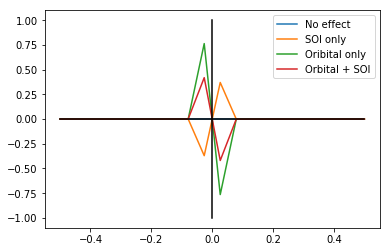

In [85]:
plt.plot(By, ic-ic_1,label = 'No effect')
plt.plot(By, ic_soi-ic_soi_1,label = 'SOI only')
plt.plot(By, ic_orb-ic_orb_1,label = 'Oribital only')
plt.plot(By, ic_orb_soi-ic_orb_soi_1,label = 'Orbital + SOI')
plt.plot(By,By*0,'k')
plt.plot(By*0,By*2,'k')
plt.legend()

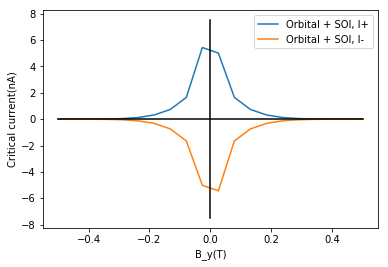

In [89]:
#plt.plot(By,ic,label = 'No effect, I+')
#plt.plot(By*-1,ic*-1, label = 'No effect, I-')
#plt.plot(By,ic_soi,label = 'SOI only, I+')
#plt.plot(By*-1,ic_soi*-1, label = 'SOI only, I-')
#plt.plot(By,ic_orb,label = 'Oribital only, I+')
#plt.plot(By*-1,ic_orb*-1, label = 'Oribital only, I-')
plt.plot(By,ic_orb_soi,label = 'Orbital + SOI, I+')
plt.plot(By*-1,ic_orb_soi*-1, label = 'Orbital + SOI, I-')
plt.plot(By,By*0,'k')
plt.plot(By*0,By*15,'k')
plt.xlabel('B_y(T)')
plt.ylabel('Critical current(nA)')
plt.legend()

In [27]:
df = pd.read_hdf('data/I_c(B_x)_mu5,10,20meV_disorder0,75meV_T0.05K_orbital_SOI_Zeeman.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_x', values=df.B_x.unique())]
hv.DynamicMap(plot, kdims=kdims)

KeyError: "Callable 'plot' accepts more positional arguments than there are kdims and stream parameters"

First mode, no disorder, T=50mK, with orbital and SOI

In [33]:
df1 = pd.read_hdf('data/I_c(B_x)_mu10_disorder0_T0.05K_orbital.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_x', values=df.B_x.unique())]
hv.DynamicMap(plot, kdims=kdims)

KeyError: "Callable 'plot' accepts more positional arguments than there are kdims and stream parameters"

First mode, no disorder, T=50mK, without orbital and SOI, Zeeman only

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_x]
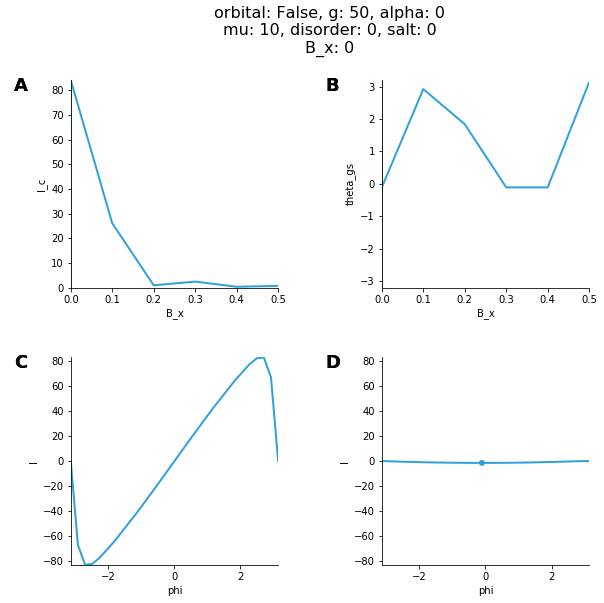

In [17]:
df = pd.read_hdf('data/I_c(B_x)_mu10_disorder0_T0.05K.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_x', values=df.B_x.unique())]
hv.DynamicMap(plot, kdims=kdims)

In [22]:
%%opts Curve (color='k') Scatter (s=200)

def plot(orbital, g, alpha, mu, disorder, salt, B_x):
    gr = gb.get_group((orbital, g, alpha, mu, disorder, salt))
    gr = gr.set_index('B_x', drop=False)
    x = gr.loc[B_x]
    current = hv.Curve((gr.B_x, gr.current_c), kdims=['B_x'], vdims=['I_c'])[0:, 0:]
    phase_gs = hv.Curve((gr.B_x, gr.phase_gs), kdims=['B_x'], vdims=['theta_gs'])[:, -3.2:3.2]
    cpr = hv.Curve((x.phases, x.currents), kdims=['phi'], vdims=['I'])
    energy = hv.Curve((x.phases, x.E), kdims=['phi'], vdims=['I'])
    IB = hv.Curve((gr.mu, gr.current_c), kdims=['potential'], vdims=['I_c'])
    E_min = hv.Scatter((x.phase_gs, x.E[x.phase_gs_arg]), kdims=['phi'], vdims=['E'])
    VLine = hv.VLine(B_x)
    return (current * VLine + phase_gs * VLine + cpr + energy * E_min).cols(2)

kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_x', values=df.B_x.unique())]

First mode, no disorder, T=50mK, with orbital but no spin-orbital

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_x]
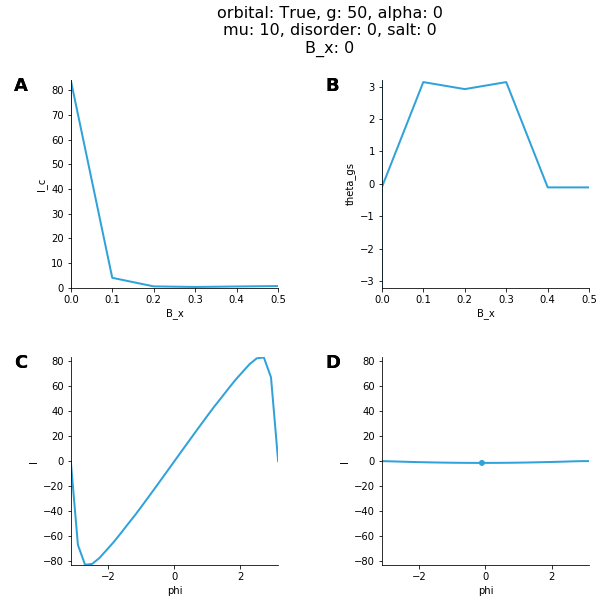

In [18]:
df = pd.read_hdf('data/I_c(B_x)_mu10_disorder0_T0.05K_onlyorbital.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_x', values=df.B_x.unique())]
hv.DynamicMap(plot, kdims=kdims)

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_x]
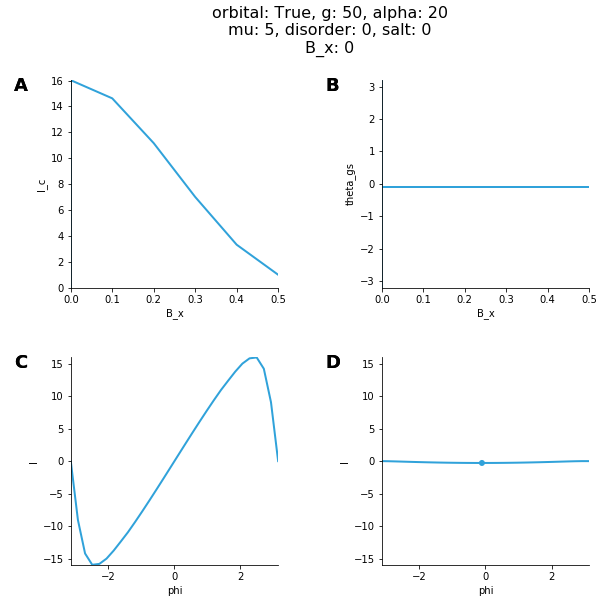

In [19]:
df = pd.read_hdf('data/I_c(B_x)_mu5,10,20meV_disorder0,75meV_T0.05K_orbital_SOI_Zeeman.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_x', values=df.B_x.unique())]
hv.DynamicMap(plot, kdims=kdims)

# Different $T$, with or without leads, different lenghts of the system

In [21]:
df2 = pd.read_hdf('data/I_c(B_x)_no_disorder_combinations_of_effects_and_geometries.hdf')
df2 = add_energy_gs(df2)
params = ['T', 'L', 'orbital', 'g', 'alpha', 'mu', 'with_leads']
gb = df2.groupby(params)

:DynamicMap   [T,L,orbital,g,alpha,mu,with_leads,B_x]
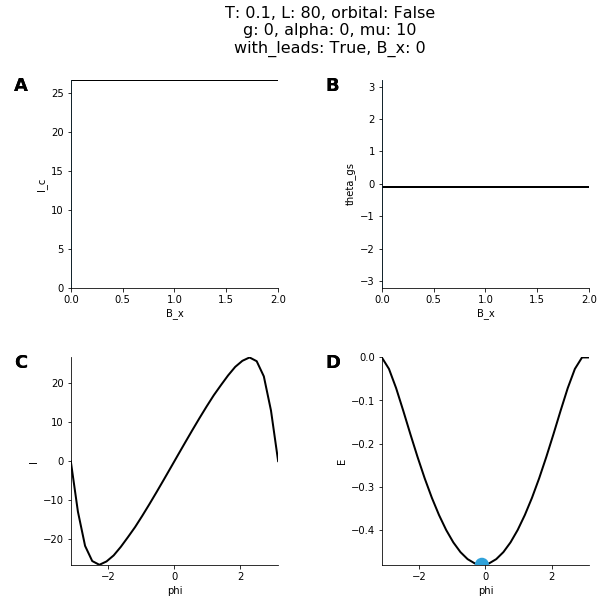

In [22]:
%%opts Curve (color='k') Scatter (s=200)

def plot(T, L, orbital, g, alpha, mu, with_leads, B_x):
    gr = gb.get_group((T, L, orbital, g, alpha, mu, with_leads))
    gr = gr.set_index('B_x', drop=False)
    x = gr.loc[B_x]
    current = hv.Curve((gr.B_x, gr.current_c), kdims=['B_x'], vdims=['I_c'])[:, 0:]
    phase_gs = hv.Curve((gr.B_x, gr.phase_gs), kdims=['B_x'], vdims=['theta_gs'])[:, -3.2:3.2]
    cpr = hv.Curve((x.phases, x.currents), kdims=['phi'], vdims=['I'])
    energy = hv.Curve((x.phases, x.E), kdims=['phi'], vdims=['E'])
    E_min = hv.Scatter((x.phase_gs, x.E[x.phase_gs_arg]), kdims=['phi'], vdims=['E'])
    VLine = hv.VLine(B_x)
    return (current * VLine + phase_gs * VLine + cpr + energy * E_min).cols(2)

kdims = [hv.Dimension('T', values=df2['T'].unique()), 
         hv.Dimension('L', values=df2.L.unique()), 
         hv.Dimension('orbital', values=df2.orbital.unique()), 
         hv.Dimension('g', values=df2.g.unique()), 
         hv.Dimension('alpha', values=df2.alpha.unique()), 
         hv.Dimension('mu', values=df2.mu.unique()), 
         hv.Dimension('with_leads', values=df2.with_leads.unique()),
         hv.Dimension('B_x', values=df2.B_x.unique())]

dm = hv.DynamicMap(plot, kdims=kdims)
dm

:DynamicMap   [T,orbital,g,alpha,mu,with_leads]
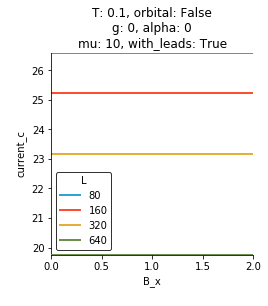

In [23]:
ds = hv.Dataset(df2)
ds.to.curve(['B_x'], ['current_c'], groupby=params, dynamic=True).overlay('L').select(B=(0, 0.5))

:DynamicMap   [T,B_x,orbital,g,alpha,mu,with_leads]
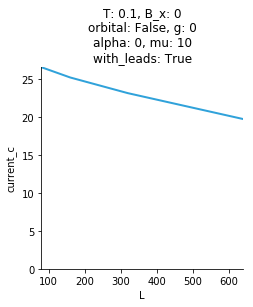

In [24]:
params = ['T', 'B_x', 'orbital', 'g', 'alpha', 'mu', 'with_leads']
curve = ds.to.curve(['L'], ['current_c'], groupby=params, dynamic=True)
curve.redim(current_c=dict(range=(0, None)))

# Rotation of field

:Layout
   .HoloMap.I  :HoloMap   [theta,disorder]
      :Curve   [B]   (current_c)
   .HoloMap.II :HoloMap   [theta,disorder]
      :Curve   [B]   (phase_gs)
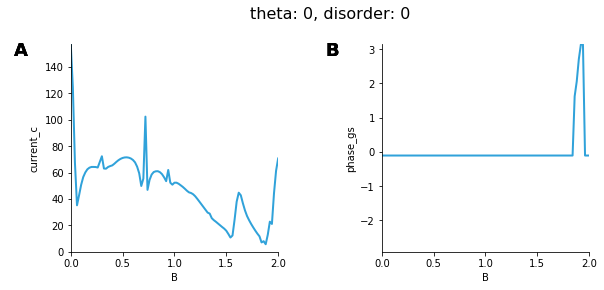
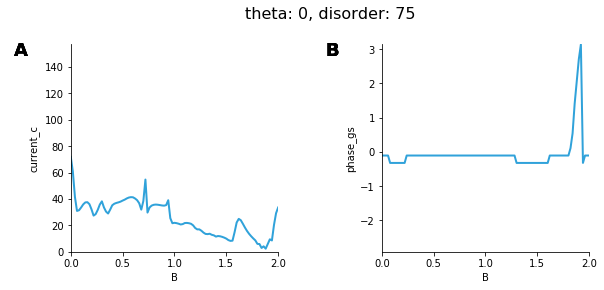
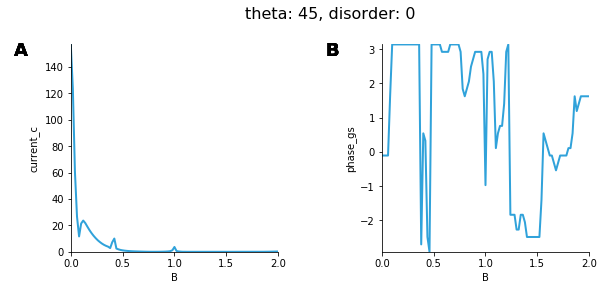
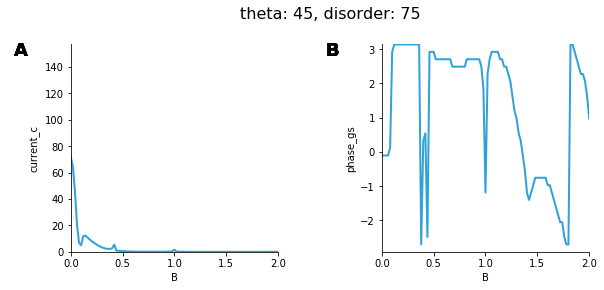
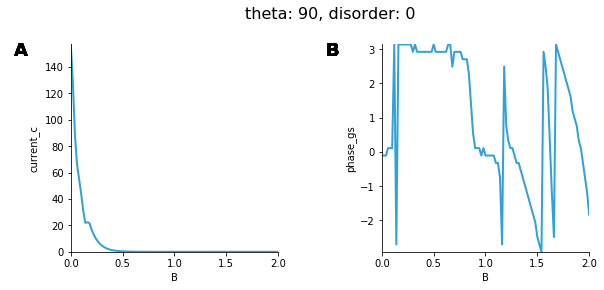
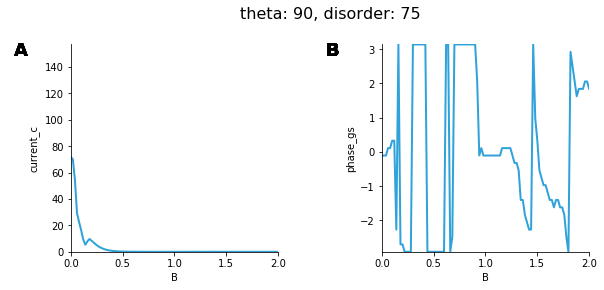

In [20]:
%%opts Path [aspect='square']
df = pd.read_hdf('data/I_c(B_x)_mu20meV_rotation_of_field_in_xy_plane.hdf')
df = add_energy_gs(df)
df2 = common.drop_constant_columns(df)
ds = hv.Dataset(df2)
current = ds.to.curve(kdims='B', vdims='current_c', groupby=['theta', 'disorder']).redim(current_c=dict(range=(0, None)))
phase = ds.to.curve(kdims='B', vdims='phase_gs', groupby=['theta', 'disorder'])
current + phase